<a href="https://colab.research.google.com/github/deepa258/MSDS462/blob/master/MSDS_462_Transfer_Learning_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Packages

In [0]:
#!pip install --upgrade tensorflow

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

def classify(img_path, model_var):
    img = image.load_img(img_path, target_size=(224, 224))
    #model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model_var.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

##Checking the contents of the drive

In [19]:
os.chdir('/content/drive/My Drive/Colab Notebooks/TFR_Images/')

print(os.listdir('.'))

['cat1.jpg', 'dog1.jpg']


## Getting the pretrained model ResNet50

In [0]:
model = tf.keras.applications.resnet50.ResNet50()

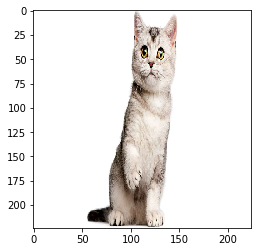

[('n02124075', 'Egyptian_cat', 0.5104026), ('n02109961', 'Eskimo_dog', 0.1402062), ('n02110185', 'Siberian_husky', 0.119348995)]


In [40]:
img_path = "/content/drive/My Drive/Colab Notebooks/TFR_Images/cat1.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0) # Increase the number of dimensions

classify(img_path, model)

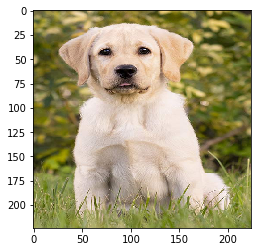

[('n02099712', 'Labrador_retriever', 0.973823), ('n02099601', 'golden_retriever', 0.011003502), ('n02087394', 'Rhodesian_ridgeback', 0.0016681054)]


In [22]:
img_path2 = "/content/drive/My Drive/Colab Notebooks/TFR_Images/dog1.jpg"
img = image.load_img(img_path2, target_size=(224, 224))
plt.imshow(img)
plt.show()

classify(img_path2, model)

# Modifying the Transfer Learning task to use a different model

In [49]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input

model2 = InceptionV3(input_tensor=Input(shape=(224, 224, 3)), weights='imagenet', include_top=True)

Using TensorFlow backend.


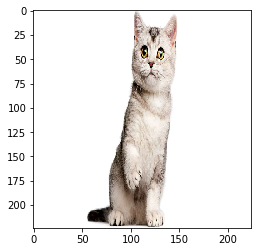

[('n03950228', 'pitcher', 0.6434801), ('n04328186', 'stopwatch', 0.19783483), ('n01924916', 'flatworm', 0.15771927)]


In [50]:
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

classify(img_path, model2)

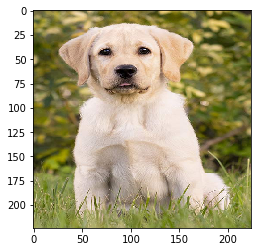

[('n03950228', 'pitcher', 0.96288556), ('n04131690', 'saltshaker', 0.037114456), ('n07930864', 'cup', 2.4174531e-09)]


In [54]:
img = image.load_img(img_path2, target_size=(224, 224))
plt.imshow(img)
plt.show()

classify(img_path2, model2)

In [55]:
from keras.applications.vgg19 import VGG19

model3 = VGG19(include_top=True, weights='imagenet', input_tensor=Input(shape=(224, 224, 3)), input_shape=(224, 224, 3), pooling=None, classes=1000)

574717952/574710816 [==============================] - 7s 0us/step


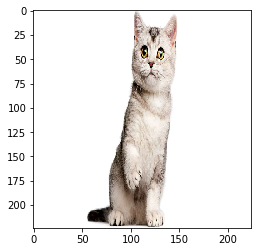

[('n02124075', 'Egyptian_cat', 0.6812041), ('n02123045', 'tabby', 0.09590109), ('n02109961', 'Eskimo_dog', 0.031066546)]


In [56]:
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

classify(img_path, model3)

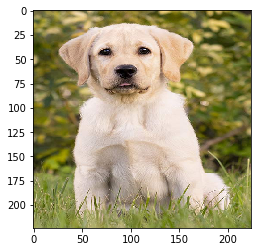

[('n02099712', 'Labrador_retriever', 0.86045516), ('n02099601', 'golden_retriever', 0.10695213), ('n02104029', 'kuvasz', 0.016848724)]


In [57]:
img = image.load_img(img_path2, target_size=(224, 224))
plt.imshow(img)
plt.show()

classify(img_path2, model3)